Лабораторная работа № 2 по Нейроинформатике

Линейная нейронная сеть. Правило обучения Уидроу-Хоффа

Выполнила: Тимофеева Наталья М8О-408Б-19

Вариант № 16

Часть 2

Фильтрация

In [266]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from matplotlib import pyplot as plt
from timeit import default_timer as timer

Задаём сигналы

In [267]:
def noised_signal(t):
    return (1 / 8) * np.cos(-5 * t ** 2 + 10 * t - 5)
def true_signal(t):
    return np.cos(-5 * t ** 2 + 10 * t - 5)

Создание модели

In [268]:
epochs = 30
discrete = 5
t = np.arange(0, 2.5, 0.01)
y_noised = noised_signal(t).tolist()
y_true = true_signal(t).tolist()

In [269]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_dim = discrete, activation='linear',
                             kernel_initializer = keras.initializers.RandomNormal(stddev = 0.5, mean = 0.0),
                             bias_initializer = keras.initializers.RandomNormal(stddev = 0.5, mean = 0.0)))

In [270]:
optimazer = keras.optimizers.SGD(learning_rate = 0.01)
model.compile(loss = 'mse', optimizer = optimazer, metrics = ['mae'])

Подготовка данных

In [271]:
windows = [y_noised[i:i + discrete] for i in range(0, len(y_noised) - discrete)]
expectations = [y_true[i] for i in range(discrete, len(y_true))]
# Проверка соответствия размеров
assert len(windows) == len(expectations)

Обучение модели

In [272]:
time_start = timer()
hist = model.fit(windows, expectations, batch_size = 1, epochs = epochs, shuffle = True)
time_end = timer()

Epoch 1/30
245/245 [==============================] - 0s 834us/step - loss: 0.3514 - mae: 0.5334
Epoch 2/30
245/245 [==============================] - 0s 762us/step - loss: 0.2320 - mae: 0.4367
Epoch 3/30
245/245 [==============================] - 0s 750us/step - loss: 0.1611 - mae: 0.3661
Epoch 4/30
245/245 [==============================] - 0s 766us/step - loss: 0.1122 - mae: 0.3028
Epoch 5/30
245/245 [==============================] - 0s 740us/step - loss: 0.0810 - mae: 0.2573
Epoch 6/30
245/245 [==============================] - 0s 746us/step - loss: 0.0604 - mae: 0.2220
Epoch 7/30
245/245 [==============================] - 0s 766us/step - loss: 0.0468 - mae: 0.1936
Epoch 8/30
245/245 [==============================] - 0s 734us/step - loss: 0.0379 - mae: 0.1719
Epoch 9/30
245/245 [==============================] - 0s 751us/step - loss: 0.0320 - mae: 0.1575
Epoch 10/30
245/245 [==============================] - 0s 737us/step - loss: 0.0280 - mae: 0.1456
Epoch 11/30
245/245 [========

In [273]:
print('Эпох: {0}'.format(epochs))
print('Время обучения: {0} секунд'.format(int(time_end - time_start)))
print('Функция потерь MSE: {0}'.format(min(hist.history['loss'])))
print('Метрика качества MAE: {0}'.format(min(hist.history['mae'])))

Эпох: 30
Время обучения: 6 секунд
Функция потерь MSE: 0.01922464370727539
Метрика качества MAE: 0.10733126103878021


Предсказание

In [274]:
predicted = model.predict(windows)
y_predicted = y_true[:discrete] + predicted.flatten().tolist()
errors = [i - j for i, j in zip(predicted, expectations)]

8/8 [==============================] - 0s 863us/step


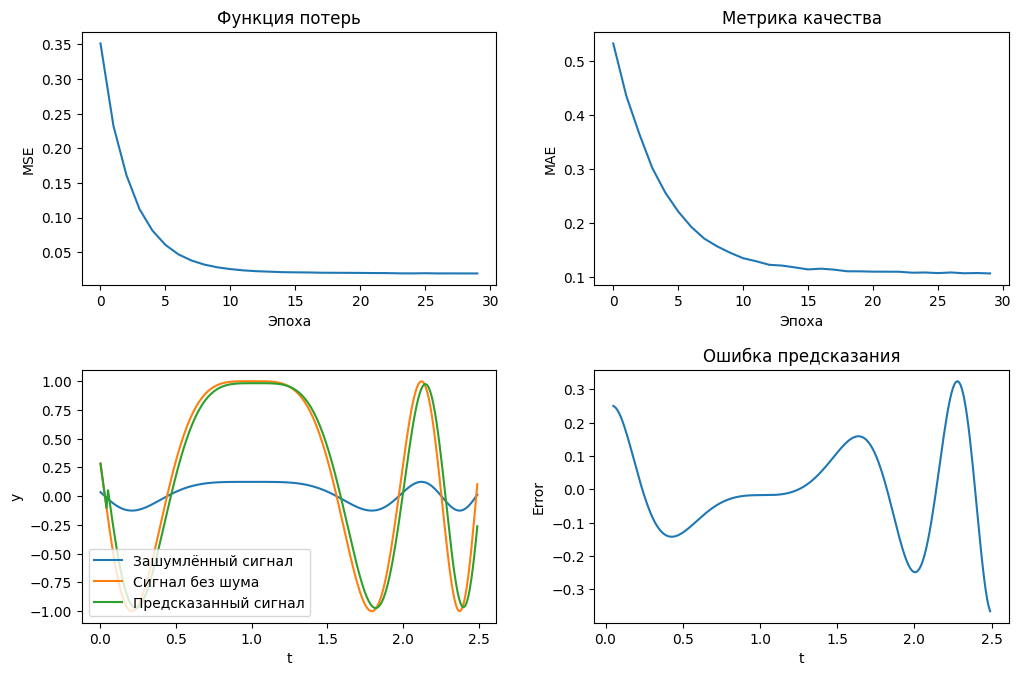

In [275]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6.5))
fig.tight_layout(h_pad = 4, w_pad = 4)

axes[0, 0].set_title('Функция потерь')
axes[0, 0].set_xlabel('Эпоха')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].plot(hist.history['loss'])

axes[0, 1].set_title('Метрика качества')
axes[0, 1].set_xlabel('Эпоха')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].plot(hist.history['mae'])

axes[1, 0].set_xlabel('t')
axes[1, 0].set_ylabel('y')
axes[1, 0].plot(t, y_noised, label = 'Зашумлённый сигнал')
axes[1, 0].plot(t, y_true, label = 'Сигнал без шума')
axes[1, 0].plot(t, y_predicted, label = 'Предсказанный сигнал')
axes[1, 0].legend()

axes[1, 1].set_title('Ошибка предсказания')
axes[1, 1].set_xlabel('t')
axes[1, 1].set_ylabel('Error')
axes[1, 1].plot(t[discrete:], errors)
